In [2]:
! pip install pandas
! pip install mlflow
! pip install xgboost
! pip install scikit-learn


In [3]:
# Load and Explore the Dataset

import pandas as pd
train_df = pd.read_csv(r"C:\Users\robin\OneDrive\Desktop\project.py\train.csv")
test_df = pd.read_csv(r"C:\Users\robin\OneDrive\Desktop\project.py\test.csv")

In [4]:
print("Train shape:",train_df.shape)
print("Test shape:",test_df.shape)

Train shape: (1200000, 21)
Test shape: (800000, 20)


In [5]:
print("\nFrist 5 rows of train dataset:")
print(train_df.head())


Frist 5 rows of train dataset:
   id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  

In [6]:
print("\nSummary statistics:")
print(train_df.describe())


Summary statistics:
                 id           Age  Annual Income  Number of Dependents  \
count  1.200000e+06  1.181295e+06   1.155051e+06          1.090328e+06   
mean   5.999995e+05  4.114556e+01   3.274522e+04          2.009934e+00   
std    3.464103e+05  1.353995e+01   3.217951e+04          1.417338e+00   
min    0.000000e+00  1.800000e+01   1.000000e+00          0.000000e+00   
25%    2.999998e+05  3.000000e+01   8.001000e+03          1.000000e+00   
50%    5.999995e+05  4.100000e+01   2.391100e+04          2.000000e+00   
75%    8.999992e+05  5.300000e+01   4.463400e+04          3.000000e+00   
max    1.199999e+06  6.400000e+01   1.499970e+05          4.000000e+00   

       Health Score  Previous Claims   Vehicle Age  Credit Score  \
count  1.125924e+06    835971.000000  1.199994e+06  1.062118e+06   
mean   2.561391e+01         1.002689  9.569889e+00  5.929244e+02   
std    1.220346e+01         0.982840  5.776189e+00  1.499819e+02   
min    2.012237e+00         0.000000  0.

In [7]:
print("\nData types and non_null counts:")
train_df.info()


Data types and non_null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  I

In [8]:
print("Test Dataset Shape:", test_df.shape)
print("\nFirst 5 Rows of Test Dataset:")
print(test_df.head())

Test Dataset Shape: (800000, 20)

First 5 Rows of Test Dataset:
        id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0            NaN                   4.0   
1  1200001  31.0  Female       126031.0        Married                   2.0   
2  1200002  47.0  Female        17092.0       Divorced                   0.0   
3  1200003  28.0  Female        30424.0       Divorced                   3.0   
4  1200004  24.0    Male        10863.0       Divorced                   2.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed      7.657981     Rural          Basic   
1        Master's  Self-Employed     13.381379  Suburban        Premium   
2             PhD     Unemployed     24.354527     Urban  Comprehensive   
3             PhD  Self-Employed      5.136225  Suburban  Comprehensive   
4     High School     Unemployed     11.844155  Suburban        Premium   

   P

In [9]:
print("\nInfo on Test Dataset:")
test_df.info()


Info on Test Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 

In [10]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
print("\nMissing Values in train dataset:")
print(train_df.isnull().sum().sort_values(ascending=False))


Missing Values in train dataset:
Previous Claims         364029
Occupation              358075
Credit Score            137882
Number of Dependents    109672
Customer Feedback        77824
Health Score             74076
Annual Income            44949
Age                      18705
Marital Status           18529
Vehicle Age                  6
Insurance Duration           1
id                           0
Property Type                0
Exercise Frequency           0
Smoking Status               0
Policy Type                  0
Policy Start Date            0
Location                     0
Education Level              0
Gender                       0
Premium Amount               0
dtype: int64


In [12]:
# Separate numeric and categorical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:")
for columns in  numerical_cols:
    print(f"{columns}")

print("\nCategorical columns:")
for columns in  categorical_cols:
    print(f"{columns}")

Numerical columns:
id
Age
Annual Income
Number of Dependents
Health Score
Previous Claims
Vehicle Age
Credit Score
Insurance Duration
Premium Amount

Categorical columns:
Gender
Marital Status
Education Level
Occupation
Location
Policy Type
Policy Start Date
Customer Feedback
Smoking Status
Exercise Frequency
Property Type


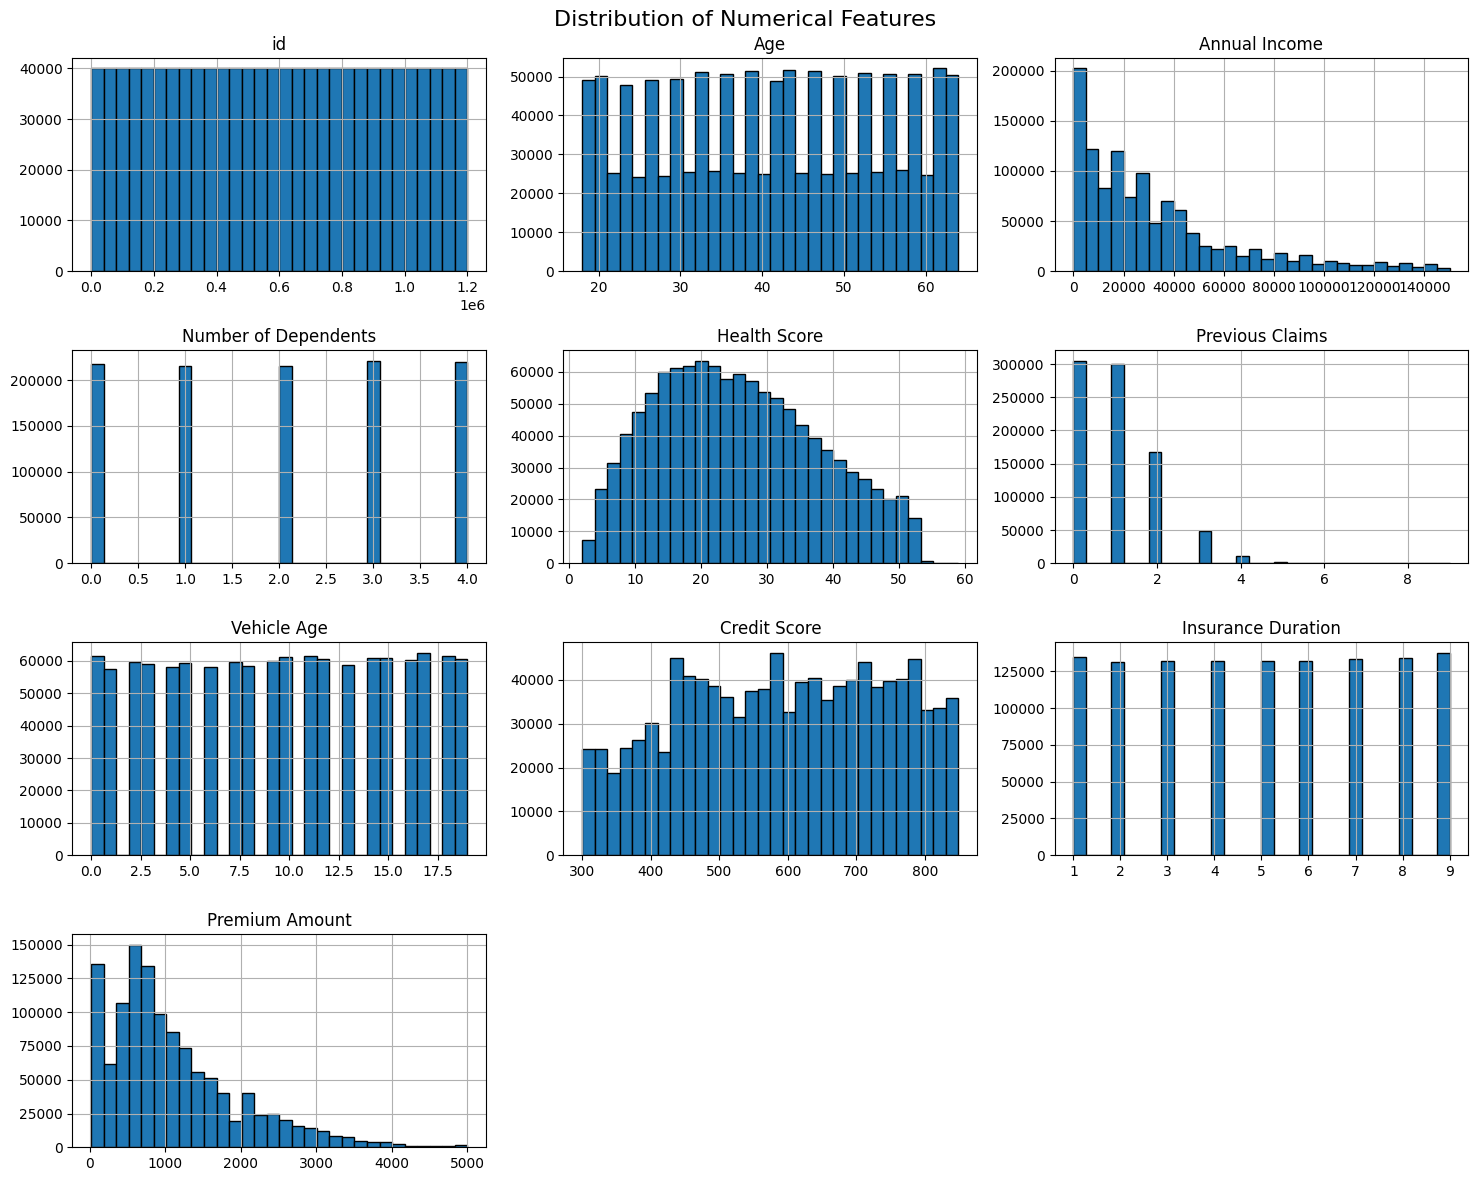

In [13]:
#  Plot histograms for numerical features  distribution

numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
train_df[numerical_cols].hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

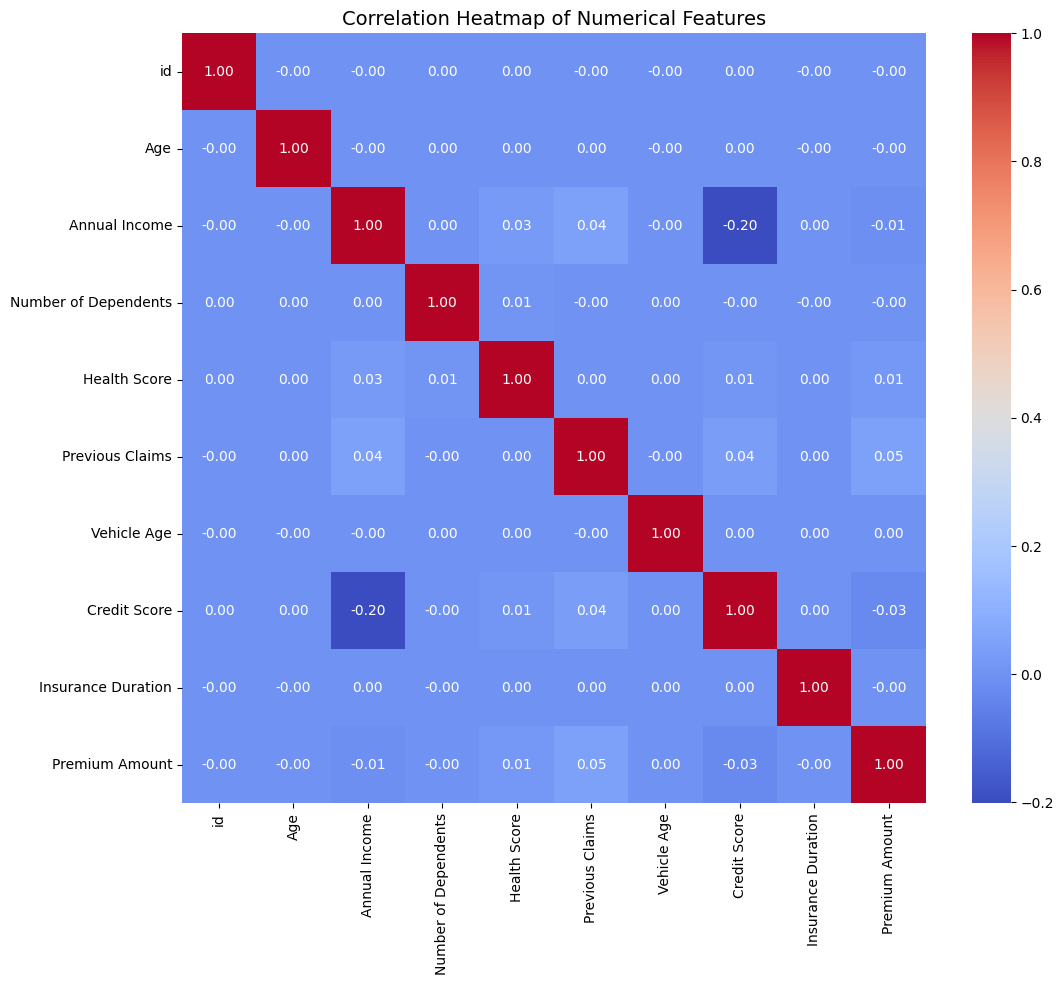

In [14]:
# Correlation Analysis
plt.figure(figsize=(12, 10))
corr_matrix = train_df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

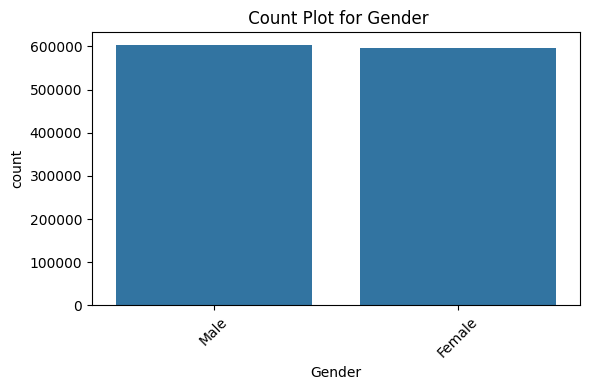

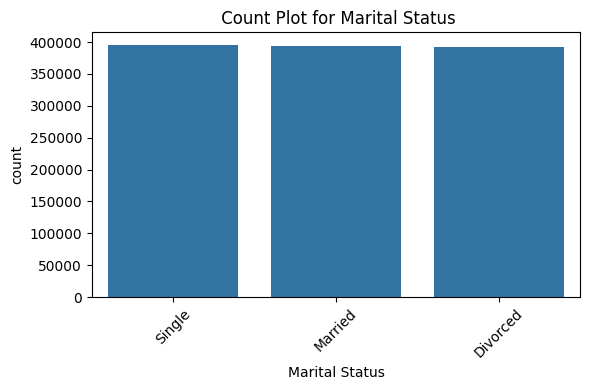

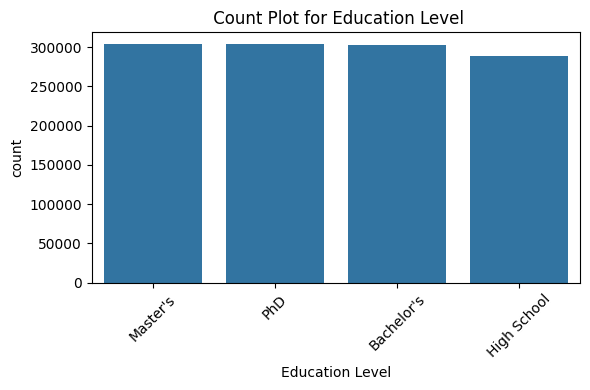

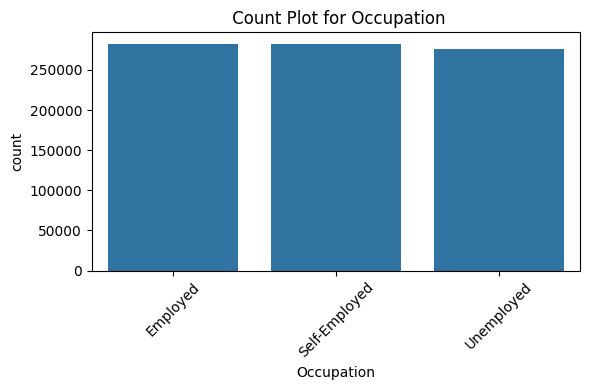

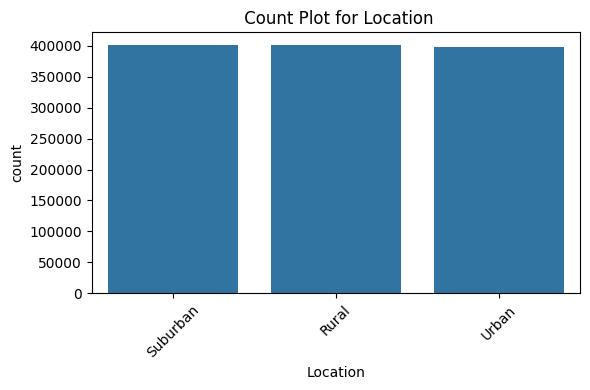

In [15]:
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()

# categorical features
for col in categorical_cols[:5]:  
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index)
    plt.title(f" Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


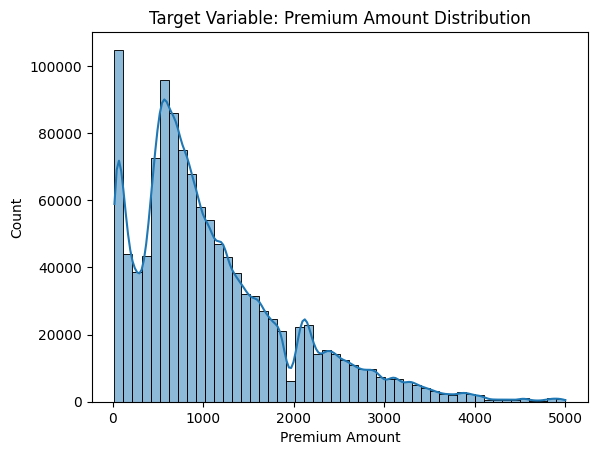

Skewness: 1.2409154932891036


In [16]:
# Target Variable Distribution
sns.histplot(train_df['Premium Amount'], kde=True, bins=50)
plt.title('Target Variable: Premium Amount Distribution')
plt.show()

# Check skewness
print("Skewness:", train_df['Premium Amount'].skew())


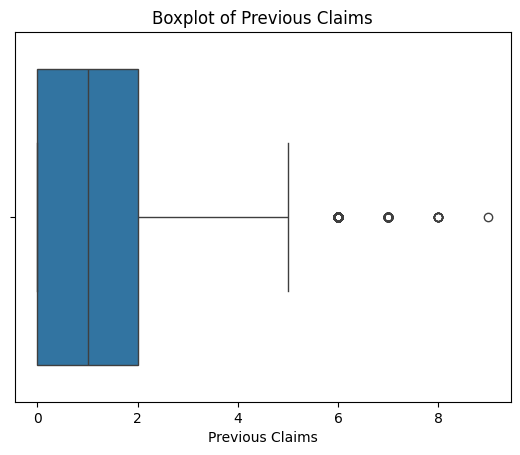

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['Previous Claims'])
plt.title("Boxplot of Previous Claims")
plt.show()

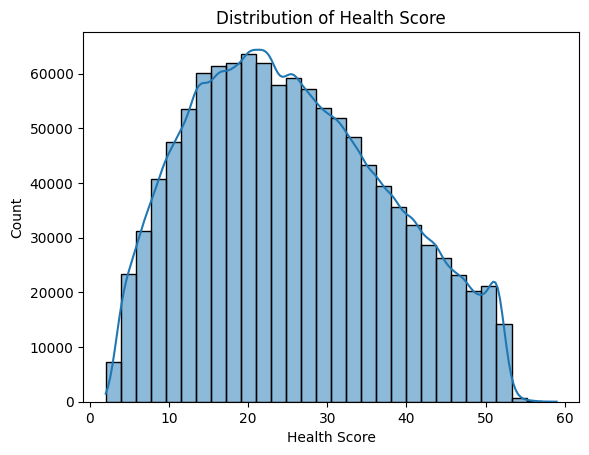

In [18]:
sns.histplot(train_df['Health Score'], bins=30, kde=True)
plt.title("Distribution of Health Score")
plt.show()

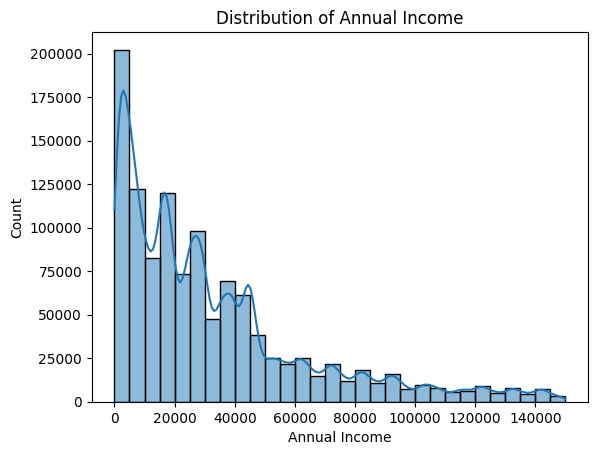

In [19]:
sns.histplot(train_df['Annual Income'], bins=30, kde=True)
plt.title("Distribution of Annual Income")
plt.show()

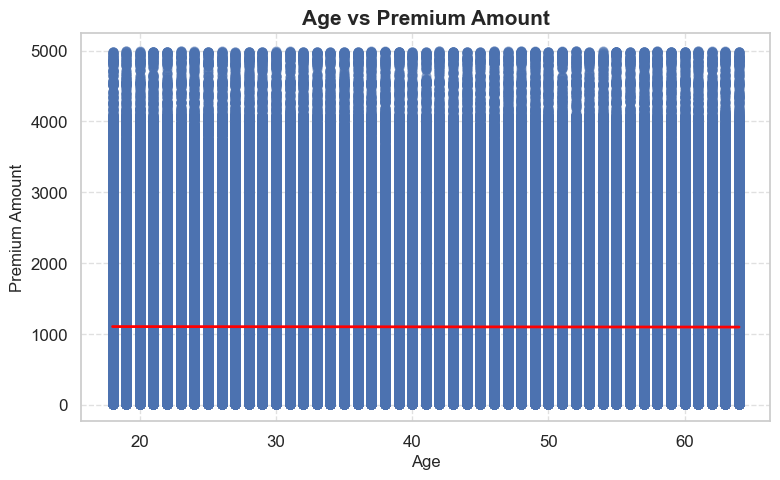

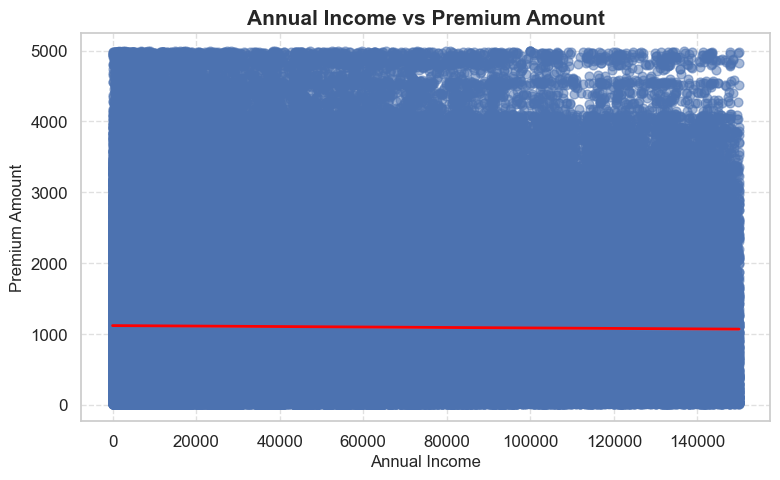

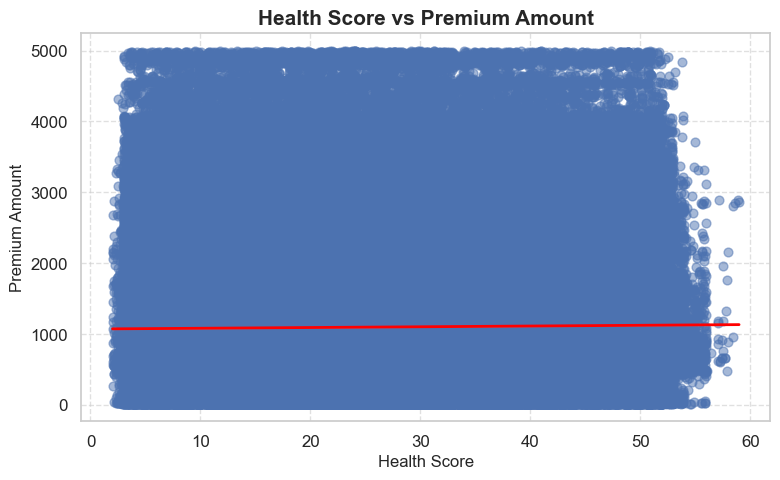

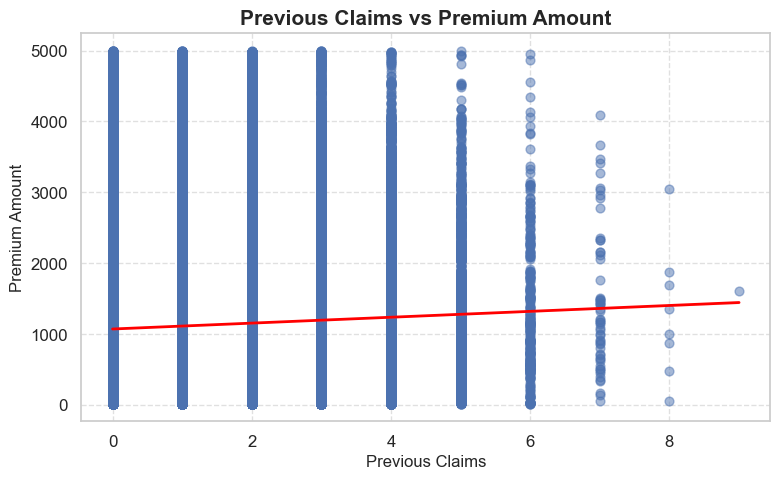

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and font scale for better readability
sns.set(style='whitegrid', font_scale=1.1)

# List of numerical features
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Previous Claims']

# Plot: Feature vs Premium Amount
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    
    # Scatterplot with a trendline (optional)
    sns.regplot(
        data=train_df,
        x=col,
        y='Premium Amount',
        scatter_kws={'alpha': 0.5, 's': 40},  # Transparency and size of dots
        line_kws={'color': 'red', 'lw': 2},  # Trend line customization
        ci=95  # Confidence interval for the trend line
    )
    
    # Title and labels
    plt.title(f'{col} vs Premium Amount', fontsize=15, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Premium Amount', fontsize=12)
    
    # Grid and layout
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


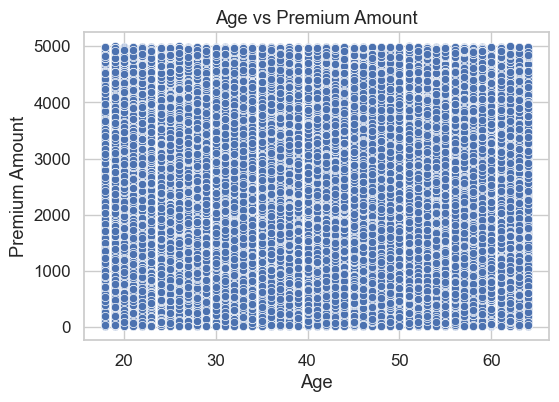

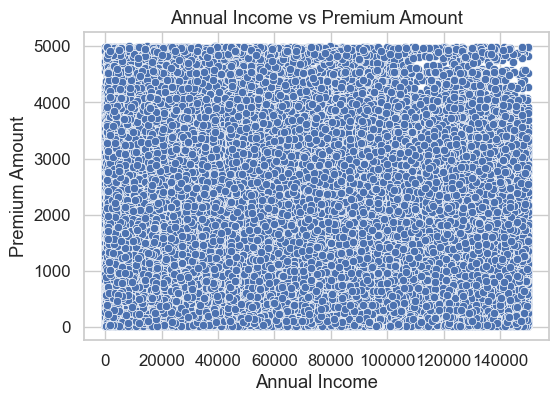

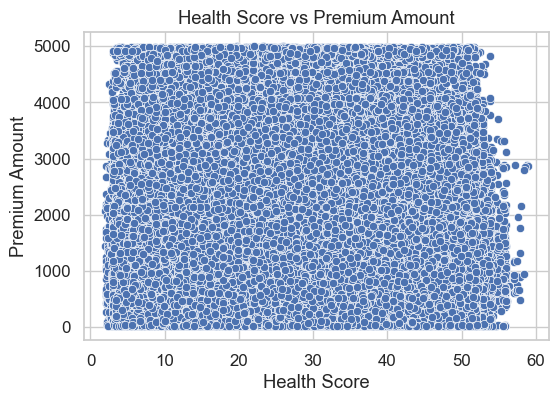

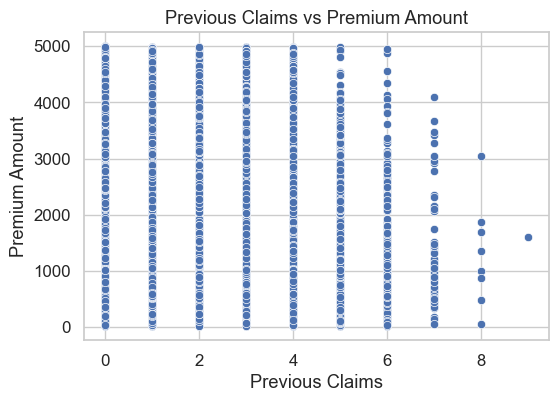

In [21]:
# Target vs Key Features
# Numerical vs Target
for col in ['Age', 'Annual Income', 'Health Score', 'Previous Claims']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=train_df[col], y=train_df['Premium Amount'])
    plt.title(f'{col} vs Premium Amount')
    plt.show()


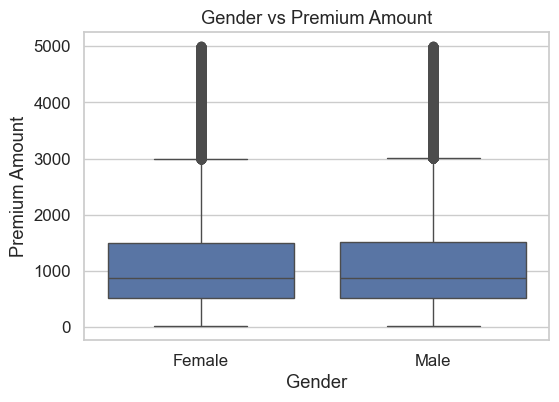

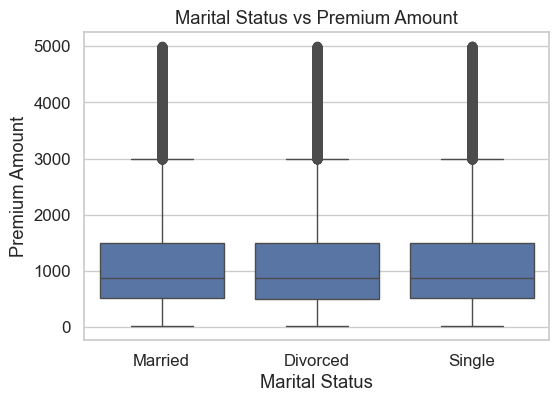

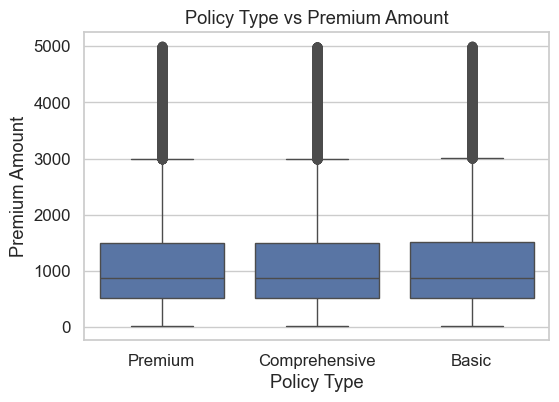

In [22]:
# Categorical vs Target 
for col in ['Gender', 'Marital Status', 'Policy Type']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train_df[col], y=train_df['Premium Amount'])
    plt.title(f'{col} vs Premium Amount')
    plt.show()


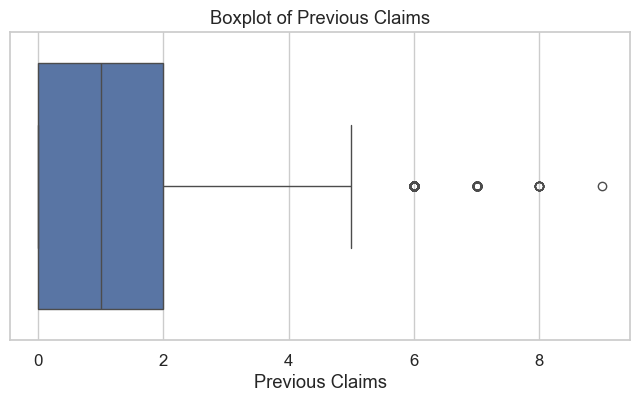

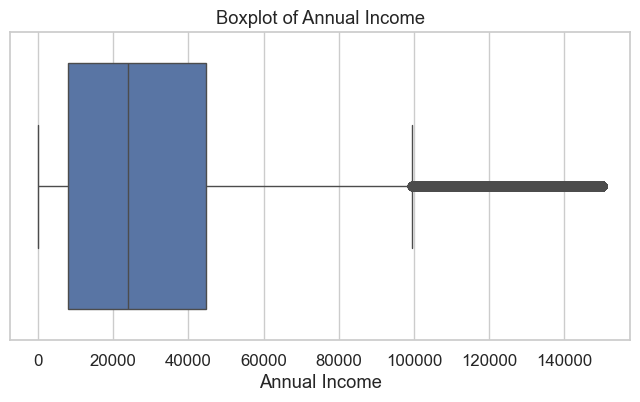

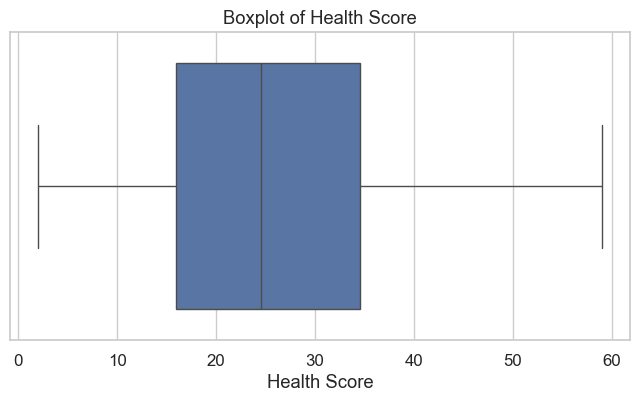

In [23]:
# Outlier Detection in Numerical Features

for col in ['Previous Claims', 'Annual Income', 'Health Score']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

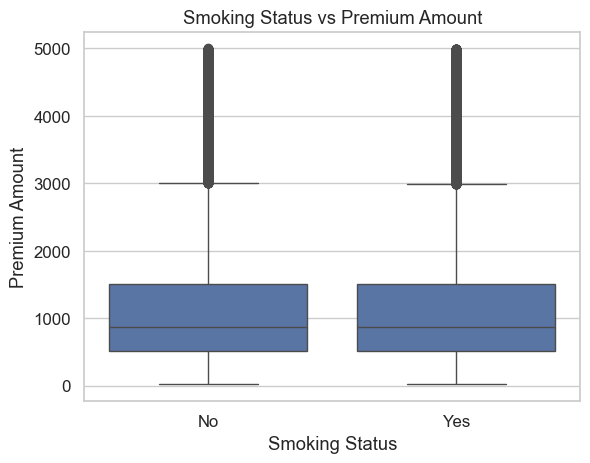

In [24]:
#  Feature Interaction
sns.boxplot(x='Smoking Status', y='Premium Amount', data=train_df)
plt.title('Smoking Status vs Premium Amount')
plt.show()


In [13]:
# Convert date column safely
date_col = 'Policy Start Date'

for df in [train_df, test_df]:
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')


In [14]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Convert Date Columns Early
# -----------------------------
date_cols = ['Policy Start Date']   # add more date columns if needed

for df in [train_df, test_df]:
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

# -----------------------------
# 2. Handle Missing Values
# -----------------------------

# Exclude target variable if present
target_col = 'Premium Amount'   # change to your actual target variable
if target_col in train_df.columns:
    numeric_cols = train_df.drop(columns=[target_col]).select_dtypes(include=[np.number]).columns
else:
    numeric_cols = train_df.select_dtypes(include=[np.number]).columns

categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns

# -----------------------------
# 2A. Numerical Missing Values → Median
# -----------------------------
for col in numeric_cols:
    median_val = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_val)

    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(median_val)

# -----------------------------
# 2B. Categorical Missing Values → Mode
# -----------------------------
for col in categorical_cols:
    mode_val = train_df[col].mode(dropna=True)

    # Some columns may have all values missing → fill with "Unknown"
    mode_val = mode_val[0] if not mode_val.empty else "Unknown"

    train_df[col] = train_df[col].fillna(mode_val)

    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(mode_val)

# -----------------------------
# 3. Final Missing Value Check
# -----------------------------
print("\nRemaining Missing Values in Train:")
print(train_df.isnull().sum())

print("\nRemaining Missing Values in Test:")
print(test_df.isnull().sum())



Remaining Missing Values in Train:
id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

Remaining Missing Values in Test:
id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insura

In [15]:
# Convert date column early
for df in [train_df, test_df]:
    df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')

In [16]:
from datetime import datetime

# Use a pandas Timestamp for subtraction so the result is a Timedelta series
today_ts = pd.Timestamp(datetime.today().date())

for df in [train_df, test_df]:
    
    if 'Policy Start Date' in df.columns:
        # ensure datetime
        df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')

        # extract parts safely (fill missing with 0)
        df['Policy Start Year'] = df['Policy Start Date'].dt.year.fillna(0).astype('Int64')
        df['Policy Start Month'] = df['Policy Start Date'].dt.month.fillna(0).astype('Int64')
        df['Policy Start Day'] = df['Policy Start Date'].dt.day.fillna(0).astype('Int64')

        # calculate age in days using Timestamp - datetime64 -> Timedelta (allows .dt.days)
        df['Policy Age (Days)'] = (today_ts - df['Policy Start Date']).dt.days

        # handle NaT or negative ages, set to 0 and ensure integer type
        df['Policy Age (Days)'] = df['Policy Age (Days)'].fillna(0).clip(lower=0).astype(int)

    else:
        df['Policy Start Year'] = 0
        df['Policy Start Month'] = 0
        df['Policy Start Day'] = 0
        df['Policy Age (Days)'] = 0


In [17]:
import numpy as np
import pandas as pd
from datetime import datetime

# -------------------------
# 1. Age Group Feature
# -------------------------
age_bins = [18, 30, 45, 60, 100]
age_labels = ['18–30', '31–45', '46–60', '60+']

train_df['Age Group'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
test_df['Age Group'] = pd.cut(test_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# -------------------------
# 2. Customer Feedback Encoding
# -------------------------
feedback_map = {'Poor': 0, 'Average': 1, 'Good': 2}

train_df['Customer_Feedback_Score'] = train_df['Customer Feedback'].map(feedback_map)
test_df['Customer_Feedback_Score'] = test_df['Customer Feedback'].map(feedback_map)

# -------------------------
# 3. Income Bracket
# -------------------------
income_bins = [0, 30000, 60000, 100000, np.inf]
income_labels = ['Low', 'Median', 'High', 'Very High']

train_df['Income_Bracket'] = pd.cut(train_df['Annual Income'], bins=income_bins, labels=income_labels)
test_df['Income_Bracket'] = pd.cut(test_df['Annual Income'], bins=income_bins, labels=income_labels)

# -------------------------
# 4. Credit Score Category
# -------------------------
credit_bins = [0, 400, 600, 800, np.inf]
credit_labels = ['Poor', 'Fair', 'Good', 'Excellent']

train_df['Credit_Category'] = pd.cut(train_df['Credit Score'], bins=credit_bins, labels=False)
test_df['Credit_Category'] = pd.cut(test_df['Credit Score'], bins=credit_bins, labels=False)

# -------------------------
# 5. Dependents Group
# -------------------------
train_df['Dependents_Group'] = train_df['Number of Dependents'].apply(
    lambda x: 'None' if x == 0 else 'Few' if x <= 2 else 'Many'
)
test_df['Dependents_Group'] = test_df['Number of Dependents'].apply(
    lambda x: 'None' if x == 0 else 'Few' if x <= 2 else 'Many'
)

# -------------------------
# 6. Days Since Policy Start
# -------------------------
for df in [train_df, test_df]:
    df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')

# use a pandas Timestamp so subtraction yields timedeltas and .dt accessor works
today_ts = pd.Timestamp.today().normalize()

train_df['Days_Since_Policy_Start'] = (today_ts - train_df['Policy Start Date']).dt.days.fillna(0).astype(int)
test_df['Days_Since_Policy_Start'] = (today_ts - test_df['Policy Start Date']).dt.days.fillna(0).astype(int)

# -------------------------
# 7. Interaction Features
# -------------------------
train_df['Age_x_Health'] = train_df['Age'] * train_df['Health Score']
test_df['Age_x_Health'] = test_df['Age'] * test_df['Health Score']

train_df['CreditScore_x_PrevClaims'] = train_df['Credit Score'].fillna(0) * train_df['Previous Claims'].fillna(0)
test_df['CreditScore_x_PrevClaims'] = test_df['Credit Score'].fillna(0) * test_df['Previous Claims'].fillna(0)

# -------------------------
# 8. Risk Flags
# -------------------------
train_df['Is_Smoker'] = train_df['Smoking Status'].fillna('No').str.lower().map({'yes': 1, 'no': 0})
test_df['Is_Smoker'] = test_df['Smoking Status'].fillna('No').str.lower().map({'yes': 1, 'no': 0})

train_df['Low_Credit_Score'] = train_df['Credit Score'].apply(lambda x: 1 if x < 600 else 0)
test_df['Low_Credit_Score'] = test_df['Credit Score'].apply(lambda x: 1 if x < 600 else 0)

train_df['Multiple_Claims'] = train_df['Previous Claims'].apply(lambda x: 1 if x > 2 else 0)
test_df['Multiple_Claims'] = test_df['Previous Claims'].apply(lambda x: 1 if x > 2 else 0)

# -------------------------
# 9. Exercise Frequency Encoding
# -------------------------
exercise_map = {'Daily': 4, 'Weekly': 3, 'Monthly': 2, 'Rarely': 1, 'Never': 0}

train_df['Exercise_Freq_Score'] = train_df['Exercise Frequency'].map(exercise_map)
test_df['Exercise_Freq_Score'] = test_df['Exercise Frequency'].map(exercise_map)

# -------------------------
# 10. Income × Credit Interaction
# -------------------------
train_df['Income_x_Credit'] = train_df['Annual Income'] * train_df['Credit Score']
test_df['Income_x_Credit'] = test_df['Annual Income'] * test_df['Credit Score']

# -------------------------
# 11. Remove Leaky Feature (Correct Way)
# -------------------------
leaky_features = ['Customer Feedback']

train_df.drop(columns=leaky_features, errors='ignore', inplace=True)
test_df.drop(columns=leaky_features, errors='ignore', inplace=True)

# -------------------------
# 12. Final Missing Value Check
# -------------------------
print("Train missing values:\n", train_df.isnull().sum()[train_df.isnull().sum() > 0])
print("\nTest missing values:\n", test_df.isnull().sum()[test_df.isnull().sum() > 0])


Train missing values:
 Series([], dtype: int64)

Test missing values:
 Series([], dtype: int64)


In [18]:
print(train_df.dtypes)
print(test_df.dtypes)

id                                   int64
Age                                float64
Gender                              object
Annual Income                      float64
Marital Status                      object
Number of Dependents               float64
Education Level                     object
Occupation                          object
Health Score                       float64
Location                            object
Policy Type                         object
Previous Claims                    float64
Vehicle Age                        float64
Credit Score                       float64
Insurance Duration                 float64
Policy Start Date           datetime64[ns]
Smoking Status                      object
Exercise Frequency                  object
Property Type                       object
Premium Amount                     float64
Policy Start Year                    Int64
Policy Start Month                   Int64
Policy Start Day                     Int64
Policy Age 

In [19]:
# Convert all object/category columns to string in train and test
for df in [train_df, test_df]:
    obj_cols = df.select_dtypes(include=['object', 'category']).columns
    df[obj_cols] = df[obj_cols].astype(str)


In [20]:
print(train_df.dtypes)
print(test_df.dtypes)

id                                   int64
Age                                float64
Gender                              object
Annual Income                      float64
Marital Status                      object
Number of Dependents               float64
Education Level                     object
Occupation                          object
Health Score                       float64
Location                            object
Policy Type                         object
Previous Claims                    float64
Vehicle Age                        float64
Credit Score                       float64
Insurance Duration                 float64
Policy Start Date           datetime64[ns]
Smoking Status                      object
Exercise Frequency                  object
Property Type                       object
Premium Amount                     float64
Policy Start Year                    Int64
Policy Start Month                   Int64
Policy Start Day                     Int64
Policy Age 

In [21]:
# Model Development
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fix Git warning for MLflow 
import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"


# Set random seed for reproducibility
np.random.seed(42)

# Define target and features
TARGET = 'Premium Amount'
X = train_df.drop(columns=[TARGET, 'id', 'Policy Start Date'], errors='ignore')
y = train_df[TARGET]

for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')

for col in X.select_dtypes(include=['int64', 'int32']).columns:
    if X[col].isna().any():
        X[col] = X[col].astype('float64')  
              
# Split data
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)


        
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64', 'int32']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Transformers
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define pipeline
pipelines = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42, n_jobs=1))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(random_state=42, verbosity=0))
    ])
}
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor( random_state=42,), 
    'XGBRegressor': XGBRegressor(objective='reg:squarederror', random_state=42)  
}

# Define parameter grids
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'regressor__max_depth': [5, 10, 20, None],
        'regressor__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'regressor__n_estimators': [50],
        'regressor__max_depth': [7]
    },
    'XGBoost': {
        'regressor__n_estimators': [50],
        'regressor__max_depth': [6]
    }
}
#  Model training & Evaluation
results = {}
for name, pipeline in pipelines.items():
    
    grid = GridSearchCV(pipeline, param_grids[name], cv=2, scoring='neg_mean_squared_error', n_jobs=1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
       
    preds = np.clip(best_model.predict(X_eval), 0, None)
    
    rmse = np.sqrt(mean_squared_error(y_eval, preds))
    mae = mean_absolute_error(y_eval, preds)
    r2 = r2_score(y_eval, preds)

    print(f"\n----- {name} -----")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")

    results[name] = (best_model, rmse, mae, r2)

# Select best model (lowest RMSE)
best_model_name = min(results, key=lambda x: results[x][1])
best_model = results[best_model_name][0]
print(f"\nBest model: {best_model_name}")


----- Linear Regression -----
RMSE: 862.70
MAE: 666.56
R²: 0.0041

----- Decision Tree -----
RMSE: 846.02
MAE: 639.03
R²: 0.0422

----- Random Forest -----
RMSE: 846.61
MAE: 644.44
R²: 0.0409

----- XGBoost -----
RMSE: 845.30
MAE: 643.63
R²: 0.0438

Best model: XGBoost


In [22]:
# Ensure mlflow and a compatible typing_extensions are installed before importing
%pip install --quiet mlflow
%pip install --quiet --upgrade "typing_extensions>=4.5.0"

import mlflow
import mlflow.sklearn

# MLflow Logging
mlflow.set_experiment("Insurance Premium Prediction")

with mlflow.start_run():
    # best_model was already fitted in the previous training cell (GridSearchCV).
    # Re-fitting here on the full X_train can trigger large memory allocations
    # (one-hot encoding / scaling over ~1M rows). Use the already-fitted model to predict.
    preds = best_model.predict(X_eval)

    # Ensure no negative values for RMSLE
    preds = np.clip(preds, 0, None)
    y_eval_clipped = np.clip(y_eval, 0, None)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_eval_clipped, preds))
    mae = mean_absolute_error(y_eval_clipped, preds)
    r2 = r2_score(y_eval_clipped, preds)
    rmsle = np.sqrt(np.mean((np.log1p(preds) - np.log1p(y_eval_clipped)) ** 2))

    # Log metrics
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)
    mlflow.log_metric("RMSLE", rmsle)

    # Log model (already fitted)
    mlflow.sklearn.log_model(best_model, "model", input_example=X_eval.iloc[:1])
    print(f"Logged model with RMSE={rmse:.2f}, MAE={mae:.2f}, R2={r2:.4f}, RMSLE={rmsle:.4f}")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


c:\Users\robin\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/11/29 15:27:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\robin\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you c

Logged model with RMSE=845.30, MAE=643.63, R2=0.0438, RMSLE=1.1464


In [23]:
import pickle
# Save the best model to a local file
with open("best_modelup.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [15]:
X.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Smoking Status',
       'Exercise Frequency', 'Property Type', 'Policy Start Year',
       'Policy Start Month', 'Policy Start Day', 'Policy Age (Days)',
       'Age Group', 'Customer_Feedback_Score', 'Income_Bracket',
       'Credit_Category', 'Dependents_Group', 'Days_Since_Policy_Start',
       'Age_x_Health', 'CreditScore_x_PrevClaims', 'Is_Smoker',
       'Low_Credit_Score', 'Multiple_Claims', 'Exercise_Freq_Score',
       'Income_x_Credit'],
      dtype='object')

In [1]:
%pip install -q numpy==1.26.4 scikit-learn==1.3.2

import numpy
from sklearn import __version__ as sklearn_version
print(numpy.__version__)
print(sklearn_version)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
1.26.4
1.3.2
